# Basketball
- ## Shot Chart

In [62]:
import pandas as pd; pd.set_option('display.max_columns', None)
import json
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import warnings
warnings.filterwarnings('ignore')

In [63]:
from nba_api.stats.endpoints import shotchartdetail

response = shotchartdetail.ShotChartDetail(team_id=0,
    player_id=0,
    season_nullable='2021-22',
    season_type_all_star='Playoffs',
    context_measure_simple = 'FGA'
)

content = json.loads(response.get_json())

results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows,columns= headers)

df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0042100101,7,1630168,Onyeka Okongwu,1610612737,Atlanta Hawks,1,11,31,Missed Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,18,1,1,0,20220417,MIA,ATL
1,Shot Chart Detail,0042100101,9,200768,Kyle Lowry,1610612748,Miami Heat,1,11,13,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,234,10,1,0,20220417,MIA,ATL
2,Shot Chart Detail,0042100101,11,1629027,Trae Young,1610612737,Atlanta Hawks,1,11,2,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,154,197,1,0,20220417,MIA,ATL
3,Shot Chart Detail,0042100101,13,202710,Jimmy Butler,1610612748,Miami Heat,1,10,50,Missed Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,19,192,51,1,0,20220417,MIA,ATL
4,Shot Chart Detail,0042100101,15,201568,Danilo Gallinari,1610612737,Atlanta Hawks,1,10,35,Missed Shot,Driving Floating Bank Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,74,26,1,0,20220417,MIA,ATL


In [64]:
def get_player_shots(name):
    data = df[df['PLAYER_NAME'] == name] # pull data
    n_players = data['PLAYER_ID'].nunique() # check number of unique players
    
    if n_players == 0:
        return 'DataFrame is empty, check spelling'
    
    if n_players == 1:
        return data
    
    if n_players > 1:
        print ('DataFrame has multiple player ids')
        return data
    
curry = get_player_shots('Stephen Curry') # pulling curry's data

In [65]:
curry = curry[(curry['HTM']=='BOS') | (curry['VTM']=='BOS')]

In [66]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [67]:
def get_player_img(player_id):
    url = "https://cdn.nba.com/headshots/nba/latest/1040x760/"+str(player_id)+".png"
    img_file = str(player_id) + ".png"
    img = plt.imread(urllib.request.urlretrieve(url, img_file)[0])
    
    return plt.imshow(img,extent=[-250, -115, 300, 400])

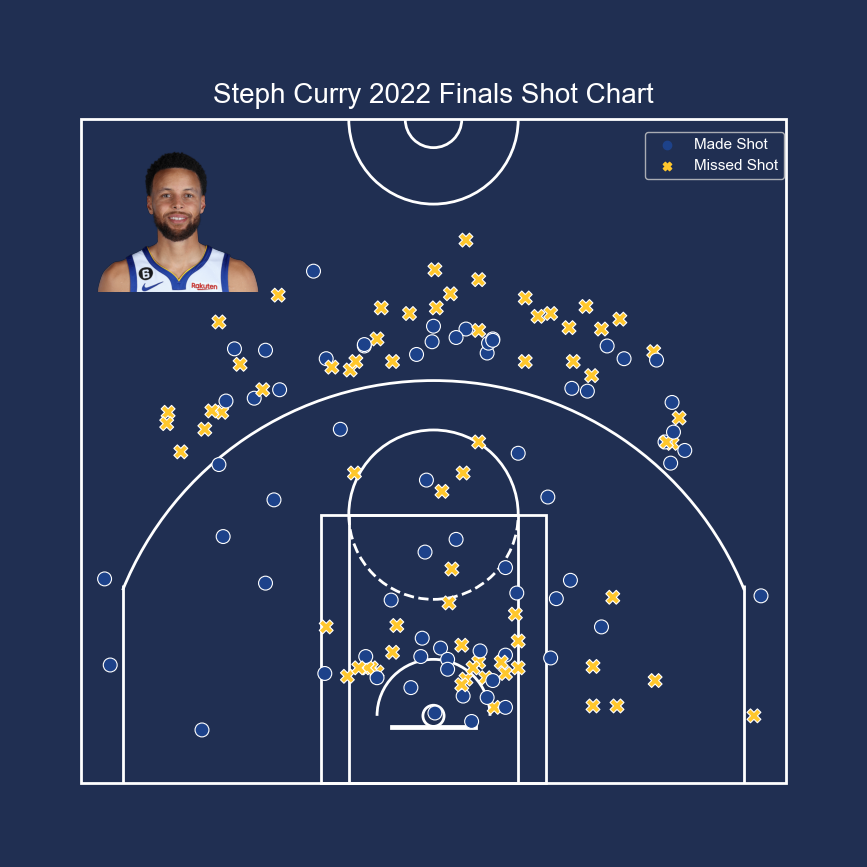

In [79]:
plt.figure(figsize=(12,11)) # initializing figure
sns.set(rc={'axes.facecolor':'#202f52', 'figure.facecolor':'#202f52'})

get_player_img(curry['PLAYER_ID'].unique()[0]) # add curry image by grabbing his PLAYER_ID from the DataFrame

draw_court(outer_lines=True, color="white") # draw blank court

ax = sns.scatterplot(x='LOC_X', y='LOC_Y', # populate with curry shots
                data=curry[curry['LOC_Y']!=474][1:300], 
                hue='EVENT_TYPE', 
                style = 'EVENT_TYPE',
                palette=["#1D428A", "#FFC72C"], 
                s = 100)


plt.xlim(-300,300)
plt.ylim(-100,500)
plt.axis('off')
plt.legend(loc=[.75,.8],labelcolor='white')
plt.title("Steph Curry 2022 Finals Shot Chart",color='white', y=.88,fontsize=20)
plt.show()